# Used Vehicles Analysis and Price Prediction


* About the data set:

  * This data set is used vehicles data publically available on https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
 

* Description of data attributes:
  * 'year':  model year of a vehicle | int32 
  * 'manufacturer':  maker of a vehicle | categorical
  * 'cylinder':  cylinder size of a vehicle | categorical
  * 'type':  body type of a vehicle | categorical
  * 'paint_color':  color of a vehicle | categorical
  * 'region': region where the vehicle was listed | categorical
  * 'state':  state where the vehicle was listed | categorical
  *  'price': listing price on Craigslist.org | float
* In descriptic analysis, I explore which feature group(s) of vehicles have greater impact on listing prices, then followed with a correlation analysis of numerical varialbes(including converted categorical variable to numeric variable).

* In inferential analysis, I use the linear regression machine learning method to build five models, selecting the most accurate one to predict the price of used vehicles as desired.




# Part 1: Import libraries, load data

In [130]:

# Import necessary libraries:
import kagglehub
import modin.pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")


In [80]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\szlau\.cache\kagglehub\datasets\austinreese\craigslist-carstrucks-data\versions\10


In [81]:
# Load dataset:
data = pd.read_csv('vehicles.csv', header=0)

# remove white space from cell and header
data = data.apply(lambda x: x.astype(str).str.strip() if x.dtype == "object" else x)
data.columns=data.columns.str.strip()


# Part 2: Data Wrangling

In [84]:
data.shape

(426880, 26)

In [85]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [86]:
# statistical info including categorical variables
data.describe(include='all')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,426880,426880,426880,426880,...,426880,426880,426880,426880,426880,0.0,426880,420331.000000,420331.000000,426880
unique,NaN,426880,404,413,NaN,NaN,43,29668,7,9,...,5,14,13,241900,360912,NaN,51,NaN,NaN,381537
top,NaN,https://wyoming.craigslist.org/ctd/d/atlanta-2...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,nan,nan,...,nan,nan,nan,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,nan
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,174104,177678,...,306361,92858,130203,7357,231,NaN,50614,NaN,NaN,68
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


In [87]:
# add a column age, calculate the age of the vehicle by substracting model year from current year when the data was collected:

data['age'] = 2022 - data['year'] 

In [88]:
data = data.replace('', np.nan)
data = data.replace('?', np.nan)
data = data.replace('nan', np.nan)

In [89]:
df =data.copy()

In [132]:
# Drop columns that won't be useful for this analysis:
df = data.drop(columns =['id','url','region','region_url','model','VIN','image_url','county','condition','size','title_status','description','posting_date'], axis=1)


In [134]:
# check missing values in each column:
df.isna().sum()

price                0
year              1205
manufacturer     17646
cylinders       177678
fuel              3013
odometer          4400
transmission      2556
drive           130567
type             92858
paint_color     130203
state                0
lat               6549
long              6549
age               1205
dtype: int64

Based on above summary, the following shows column name and number of missing values:
* year 1205
* manufacturer 17,646
* cylinders  177,678
* fuel 3013
* odometer 4400
* transmission 2556
* drive 130,567
* type 92,858
* paint_color  130,203
* lat, long 6549


### Dealing with null values
* Drop rows with missing values in columns of 'year','manufacturer','odometer', 'lat','long'.
* Replace missing values with mean value for 'odometer'.
* Replace missing values with common values for 'type', 'cylinders', 'fuel', 'transmission', 'drive', and 'paint_color'.


In [136]:
df.cylinders.unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [74]:
df.cylinders.value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

#### Drop missing values in columns: ['year','odometer','transmission','cylinders','fuel','drive','type','lat','long','age']

In [138]:
# drop num rows with null value of year

df.dropna(subset=['year','odometer','transmission','cylinders','fuel','drive','type','lat','long','age'], axis=0, inplace=True)


In [140]:
df.isnull().sum()

price               0
year                0
manufacturer     6003
cylinders           0
fuel                0
odometer            0
transmission        0
drive               0
type                0
paint_color     26852
state               0
lat                 0
long                0
age                 0
dtype: int64

#### Fill missing values with 0 in columns: ['manufacturer','paint_color']

In [142]:
df[['manufacturer','paint_color']] = df[['manufacturer','paint_color']].fillna('other')
df.isna().sum()


price           0
year            0
manufacturer    0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
state           0
lat             0
long            0
age             0
dtype: int64

In [144]:
df.shape

(185605, 14)

In [154]:

# Reset index due to delection of rows.
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185605 entries, 0 to 185604
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         185605 non-null  int64  
 1   year          185605 non-null  float64
 2   manufacturer  185605 non-null  object 
 3   cylinders     185605 non-null  object 
 4   fuel          185605 non-null  object 
 5   odometer      185605 non-null  float64
 6   transmission  185605 non-null  object 
 7   drive         185605 non-null  object 
 8   type          185605 non-null  object 
 9   paint_color   185605 non-null  object 
 10  state         185605 non-null  object 
 11  lat           185605 non-null  float64
 12  long          185605 non-null  float64
 13  age           185605 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 19.8+ MB


In [ ]:
X_train, 

numerical_features = df.select_dtypes('number').columns.tolist()
categorical_features = df.select_dtypes('object').columns.tolist()


In [156]:
# OneHot encoding for categorcal features


# before convert, you need to make sure no null values in cylinders

df.cylinders = df.cylinders.replace({'8 cylinders': 8, '6 cylinders':6, '4 cylinders':4, '5 cylinders':5,
       '10 cylinders':10, 'other':0, '3 cylinders':3, '12 cylinders':12}).astype(int)


# Ensure 'drive' is a string column:

df['drive'] = df['drive'].astype(str)

# Replace the values using a dictionary:
df['drive'] = df['drive'].replace({'rwd': '1', '4wd': '3', 'fwd': '2'})

# Convert 'drive' back to integer:
df['drive'] = df['drive'].astype(int)

# Check the unique values in the 'drive' column:
print(df['drive'].unique())

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185605 entries, 0 to 185604
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         185605 non-null  int64  
 1   year          185605 non-null  float64
 2   manufacturer  185605 non-null  object 
 3   cylinders     185605 non-null  int64  
 4   fuel          185605 non-null  object 
 5   odometer      185605 non-null  float64
 6   transmission  185605 non-null  object 
 7   drive         185605 non-null  int64  
 8   type          185605 non-null  object 
 9   paint_color   185605 non-null  object 
 10  state         185605 non-null  object 
 11  lat           185605 non-null  float64
 12  long          185605 non-null  float64
 13  age           185605 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 19.8+ MB


### Dealing with outliers


In [158]:

# Finding describtive info for numerical variables
df.describe()

,price,year,odometer,lat,long,age
count,1.856050e+05,185605.000000,1.856050e+05,185605.000000,185605.000000,185605.000000
mean,4.584441e+04,2010.362625,1.048236e+05,38.848961,-95.599493,11.637375
std,9.068644e+06,9.651575,1.987641e+05,6.004434,18.815651,9.651575
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.719900,0.000000
25%,5.600000e+03,2007.000000,4.830200e+04,35.069609,-114.981000,6.000000
50%,1.199500e+04,2013.000000,9.598500e+04,39.578815,-89.613253,9.000000
75%,2.478800e+04,2016.000000,1.406200e+05,42.595900,-81.050000,15.000000
max,3.736929e+09,2022.000000,1.000000e+07,82.252826,139.691700,122.000000


### Definition of outliers
* larger than Q3 by at least 1.5 times the interquartile range (IQR), or
* smaller than Q1 by at least 1.5 times the IQR.
### Findng price outliers:
* Q1 (25%) = 5600
* Q3 (75%) = 24788
* IQR = Q3 - Q1 = 19188
* Outlier > 24788 + (1.5 * 19188)
* Outlier > 53570
### Finding year outliers:
* Q1 (25%) = 2007
* Q3 (75%) = 2016
* IQR = Q3 - Q1 = 9
* Outlier < 2008 - (1.5 * 9)
* Outlier < 1994

### Based on statistical summary and visulization plot:
* observations with price over $57488 are outliers.
* observations with year older than 1995 are outliers.


In [195]:

# print out number of outliers 
print(len(df[df['price'] > 40570]))
print(len(df[df['year'] < 1994]))


11111
7424


### Remove Outliers 

In [183]:

# Removing outliers and extremly cheap ones, and reset index
dfc = df[(df['year'] >= 1994) & (df['price'] > 2000) & (df['price']<= 53570)]
dfc = dfc.reset_index(drop=True)


In [185]:

# Save the file to csv file
dfc.to_csv('vehicles_clean_data.csv')
dfc.shape

(154112, 14)

#### There are total 158948 observations and 14 columns

In [528]:
'''
dfc.year = dfc.year / dfc.year.max()
dfc.cylinders = dfc.cylinders / dfc.cylinders.max()
dfc.odometer = dfc.odometer / dfc.odometer.max()
dfc.age = dfc.age / dfc.age.max()

'''

'\ndfc.year = dfc.year / dfc.year.max()\ndfc.cylinders = dfc.cylinders / dfc.cylinders.max()\ndfc.odometer = dfc.odometer / dfc.odometer.max()\ndfc.age = dfc.age / dfc.age.max()\n\n'

# Part 3: Exploratory Data Analysis (EDA)

#### Preliminary steps in data analysis to:
* Summarize main characteristics of the data
* Gain better understanding of the data set
* Uncover relationships between variables
* Extract important variables that have most impact on target 'price'

Objectives:
* Descriptive Statistics
* GroupBy
* ANOVA
* Correlation
* Correlation-Statistics

### Continuous Numerical Variables:
* Contains any value within some range
* Can be of type 'int' or 'float'

### Visulizing numerical variables using scatterplots with fitted lines
* If the values are randomly distributed on the graph, it indicates the linear model is a good fit.

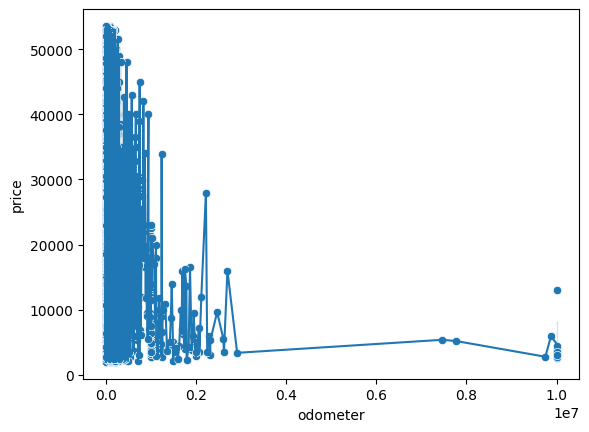

In [187]:
sns.scatterplot(data=dfc, x='odometer',y='price')
sns.lineplot(data=dfc, x='odometer', y='price')
plt.show()
plt.close()

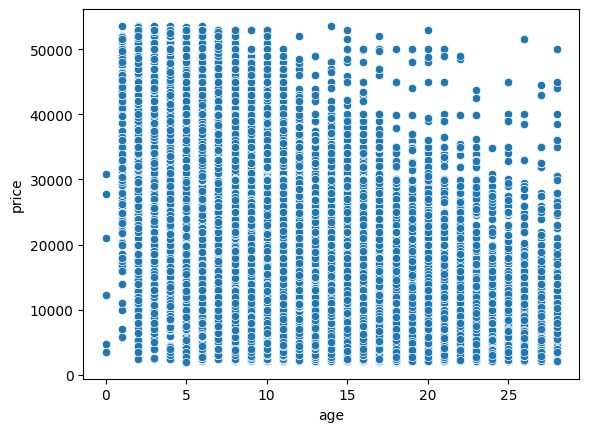

In [188]:
sns.scatterplot(data=dfc, x='age', y='price')
plt.show()
plt.close()

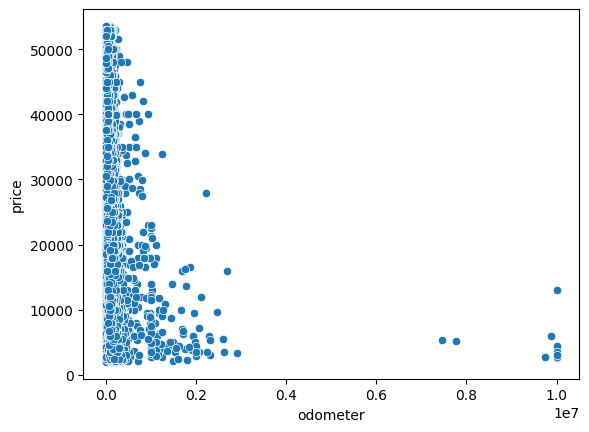

In [197]:
sns.scatterplot(data=dfc, x='odometer', y='price')
plt.show()
plt.close()

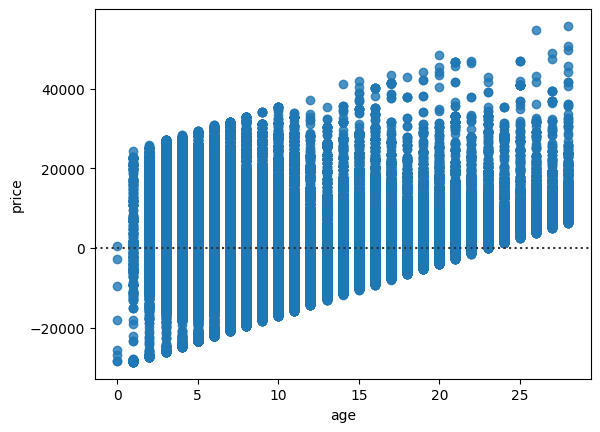

In [177]:

sns.residplot(data=dfc, x='age', y='price')
plt.show()
plt.close()

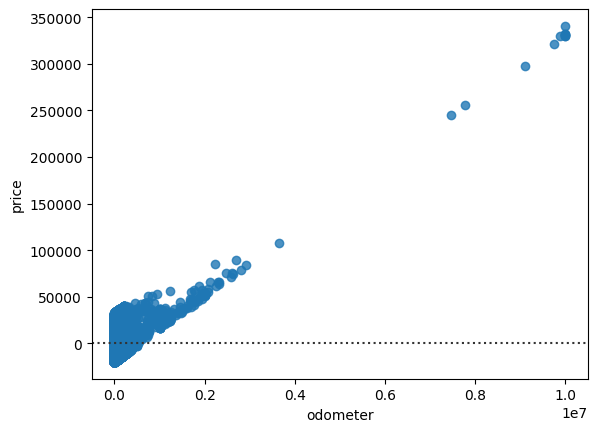

In [179]:

sns.residplot(data=dfc, x='odometer', y='price')
plt.show()
plt.close()

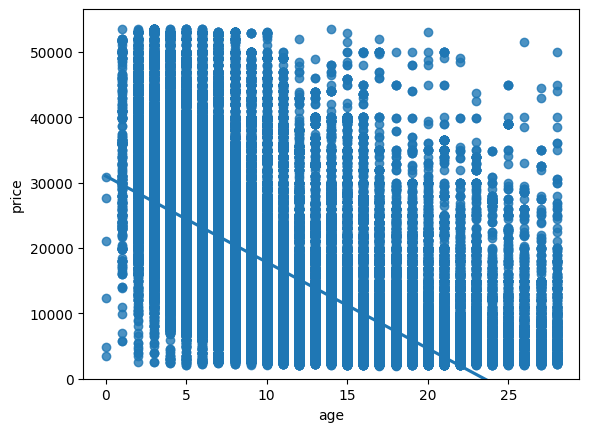

In [51]:

sns.regplot(x='age', y='price', data=dfc)
plt.ylim(0,)
plt.show()
plt.close()

#### Findings: 'age' has strong negative relationship with target variable 'price'

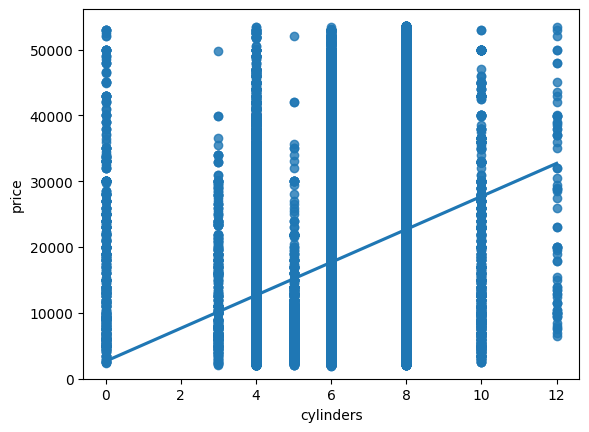

In [52]:
sns.regplot(x='cylinders', y='price', data=dfc)
plt.ylim(0,)
plt.show()
plt.close()

#### Findings: 'cylinders' has positive relatinship with target 'price'

### Categorical Variables


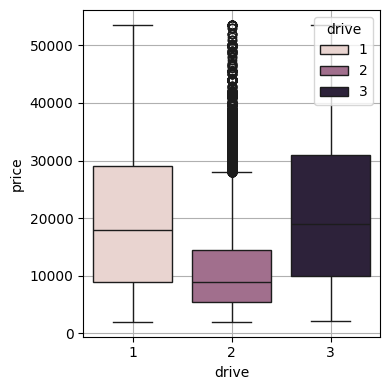

In [55]:

plt.figure(figsize=(4,4))
sns.boxplot(x = 'drive', y='price', data=dfc, hue='drive')
plt.tight_layout()
#plt.legend().remove()
plt.grid(True)
plt.show()
plt.close()

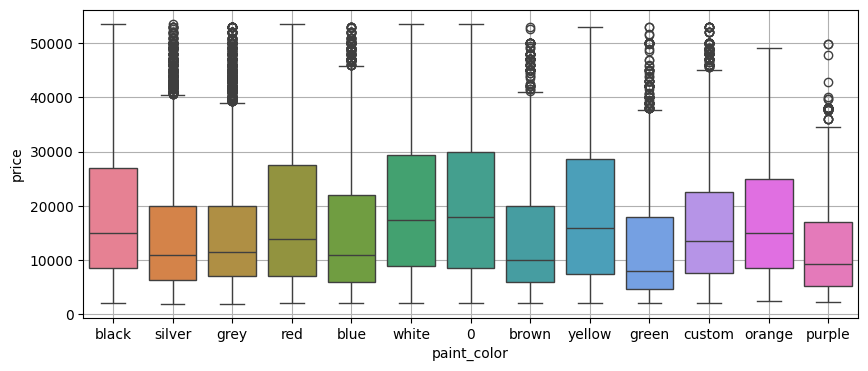

In [57]:
plt.figure(figsize=(10,4))
sns.boxplot(x = 'paint_color', y='price', data=dfc, hue='paint_color')
plt.legend().remove()
plt.grid(True)
plt.show()
plt.close()

#### Findings from color box plots:
* White vehicles has highest median price
* Green has the lowest median price

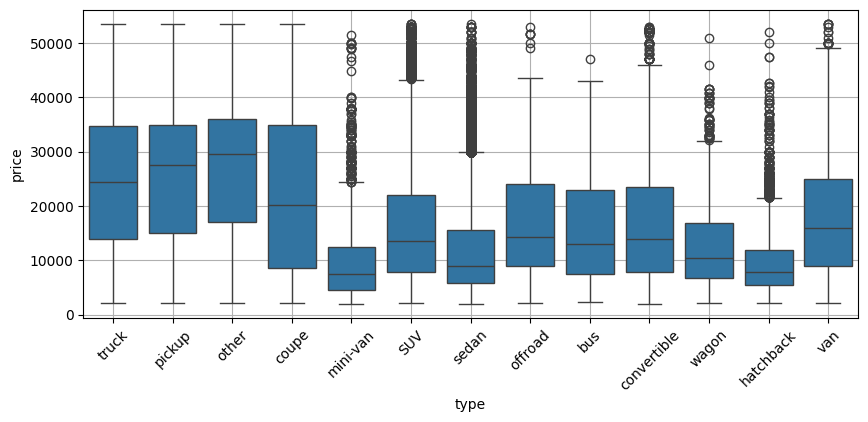

In [60]:
plt.figure(figsize=(10,4))
sns.boxplot(x = 'type', y='price', data=dfc)

plt.grid(True)
plt.xticks(rotation=45)
plt.show()
plt.close()

#### Findings: pickup and truck have the highest median price

### Descriptive Statistical Analysis
* the count of the variable
* the mean
* the standard deviation (std)
* the minimum value
* the IQR
* the maximum value

In [62]:
dfc.describe()

,price,year,cylinders,odometer,drive,lat,long,age
count,154112.000000,154112.000000,154112.000000,1.541120e+05,154112.000000,154112.000000,154112.000000,154112.000000
mean,17341.467219,2011.634701,5.863262,1.042539e+05,2.247398,38.788619,-94.607794,10.365299
std,11993.148095,5.521077,1.625938,1.089331e+05,0.765953,5.999275,18.488277,5.521077
min,2004.000000,1994.000000,0.000000,0.000000e+00,1.000000,-84.122245,-159.719900,0.000000
25%,7495.000000,2008.000000,4.000000,5.237175e+04,2.000000,35.087703,-111.640600,6.000000
50%,13990.000000,2013.000000,6.000000,9.960000e+04,2.000000,39.555745,-88.115246,9.000000
75%,25695.000000,2016.000000,8.000000,1.430000e+05,3.000000,42.484503,-80.656159,14.000000
max,53563.000000,2022.000000,12.000000,1.000000e+07,3.000000,82.252826,139.691700,28.000000


#### Value Counts

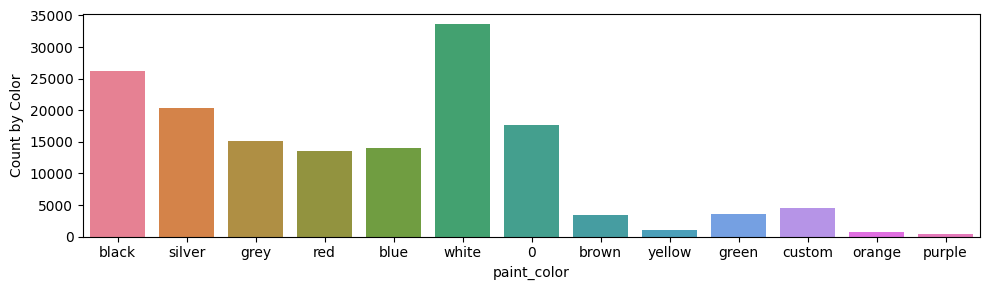

In [65]:
# count by color group:
plt.figure(figsize=(10,3))
sns.countplot(data=dfc, x='paint_color',hue='paint_color')
#plt.title('Figure 1: Total Count of Listings by Color')
plt.ylabel('Count by Color')
plt.legend().remove()
plt.tight_layout()
plt.show()
plt.close()

#### Findings: white color is the most popular color, followed by black.

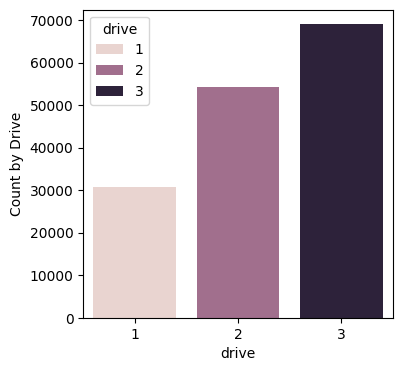

In [68]:
# count by drive group:
plt.figure(figsize=(4,4))
sns.countplot(data=dfc, x='drive', hue='drive')
#plt.title('Figure 2: Total Count of Listings by Drive')
plt.ylabel('Count by Drive')
#plt.legend().remove()
plt.show()
plt.close()

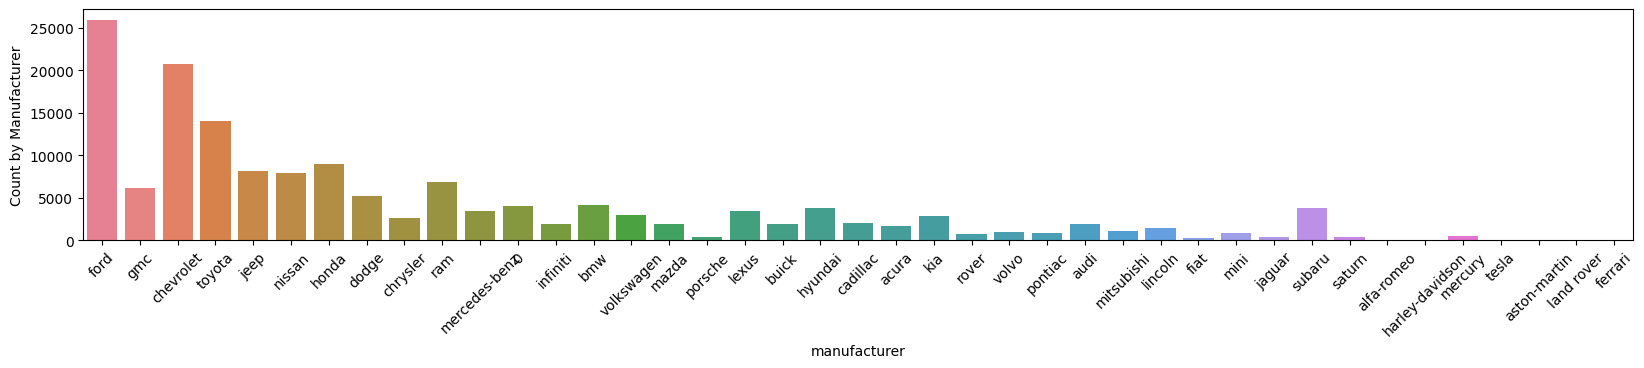

In [70]:
# count by manufacturer group:
plt.figure(figsize=(20,3))
sns.countplot(data=dfc, x='manufacturer', hue='manufacturer')
#plt.title('Figure 2: Total Count of Listings by Manufacturer')
plt.ylabel('Count by Manufacturer')
plt.legend().remove()
plt.xticks(rotation=45)
plt.show()
plt.close()

#### Findings: Ford is the most popular make, followed by Chevrolet and Toyota

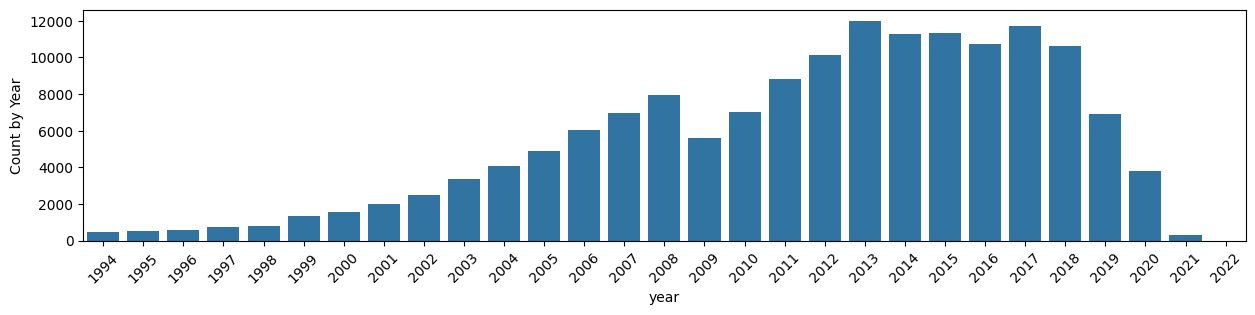

In [72]:

# count by year group:
dfc.year = dfc.year.astype(int)
plt.figure(figsize=(15,3))
sns.countplot(data=dfc, x='year')
#plt.title('Figure 3: Total Count of Listings by Year')
plt.ylabel('Count by Year')
plt.xticks(rotation=45)
plt.show()
plt.close()

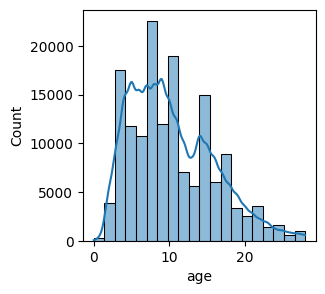

In [75]:
plt.figure(figsize=(3, 3))
sns.histplot(dfc['age'], kde=True, bins=20)
# Show the plot
plt.show()

#### Correlation between price and other variables
* Close to +1: large positive relationship
* Close to -1: large negative relationship
* Close to 0: no relationship
* P-value < 0.001: strong certainty in the result
* P-value < 0.05: moderate certainty in the result
* P-value < 0.1: week certainty in the result
* P-value > 0.1: no certainty in the result

'''
from scipy import stats

pearson_coef, p_value = stats.pearsonr(dfn.age, dfn.price)
print(pearson_coef, p_value)
'''

### Part 3 Summary: 
* white is the most common color.
* 4wd is the most popular drive type, followed by fwd (front wheel drive).
* Ford is the most popular make
* pickup and truck have the highest median price
* white color vehicles has the highest median price
* 4wd and rwd (drive) have identical price range, fwd has much lower median and price range


# Part 4: Data Preparation for Modeling

### Data Normalization


#### Methods of normalization
* Simple feature scaling (range 0 ~ 1) : Xnew = Xold / Xmax 

* Min-Max (range 0 ~ 1): Xnew = (Xold - Xmin) / (Xmax - Xmin)

* Z-score (range -3 ~ 3): Xnew = Xold - avg / std

1. df.year = (df.year-df.year.mean())/df.year.std()



#### Using Z-score method for data normalization

In [77]:

# read csv file 
dfn = pd.read_csv('vehicles_clean_data.csv',index_col=0)

# Using Z-score method for data normalization
dfn.year = (dfn.year-dfn.year.mean())/dfn.year.std()
dfn.cylinders = (dfn.cylinders-dfn.cylinders.mean())/dfn.cylinders.std()
dfn.odometer = (dfn.odometer-dfn.odometer.mean())/dfn.odometer.std()
dfn.age = (dfn.age-dfn.age.mean())/dfn.age.std()
dfn.drive = (dfn.drive-dfn.drive.mean())/dfn.drive.std()
dfn.price = (dfn.price-dfn.price.mean())/dfn.price.std()


In [79]:
dfn.describe()

,price,year,cylinders,odometer,drive,lat,long,age
count,1.541120e+05,1.541120e+05,1.541120e+05,1.541120e+05,1.541120e+05,154112.000000,154112.000000,1.541120e+05
mean,-4.794983e-18,9.159893e-15,2.500768e-16,6.586186e-17,-1.711440e-16,38.788619,-94.607794,-1.622917e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.999275,18.488277,1.000000e+00
min,-1.278852e+00,-3.194069e+00,-3.606079e+00,-9.570451e-01,-1.628557e+00,-84.122245,-159.719900,-1.877405e+00
25%,-8.210077e-01,-6.583319e-01,-1.145961e+00,-4.762754e-01,-3.229937e-01,35.087703,-111.640600,-7.906609e-01
50%,-2.794485e-01,2.472886e-01,8.409803e-02,-4.272274e-02,-3.229937e-01,39.555745,-88.115246,-2.472886e-01
75%,6.965254e-01,7.906609e-01,1.314157e+00,3.556868e-01,9.825694e-01,42.484503,-80.656159,6.583319e-01
max,3.020186e+00,1.877405e+00,3.774275e+00,9.084239e+01,9.825694e-01,82.252826,139.691700,3.194069e+00


# Part 5: Model Development


### Model 1: Multiple Linear Regression

In [81]:
# Define predictor variable and target variable
X = dfc[['cylinders','odometer','drive','age']]
y = dfc['price']  # target

#### Split data into train and test dataset

In [84]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [86]:

from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train, y_train)
yhat=lr.predict(x_test)

In [90]:

from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures()
xpr=pr.fit_transform(x_train)
xpr.shape

(123289, 15)

### Pipiline

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [94]:

Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())]

pipe=Pipeline(Input)
pipe



Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [96]:
dfc.price = dfc.price.astype(int)
# Import linear_model from scikit-learn
from sklearn.linear_model import LinearRegression
# Create a linear regression object using the constructor:
lm=LinearRegression()

# Use lm.fit(X,y) to fit the model, i.e find the parameters b0 and b1
lm.fit(X,y)
# obtain a predictor
Yhat=lm.predict(X)
# Find the intercept(b0)
print(lm.intercept_)
# Find the coefficients(b1,b2,b3,b4)
print(lm.coef_)
# y = b0 + b1X1 + b2X2 + b3X3 + b4X4
# Price=11207 + (3389)* cylinders - (0.015)* odometer + (1121)* drive - (0.0014)* age


11242.83551996099
[ 3.30959926e+03 -1.47416875e-02  1.03502184e+03 -1.35988765e+03]


In [98]:
Yhat_df = pd.DataFrame(Yhat, columns=['prediction'])
output = pd.concat([X,Yhat_df],axis=1)
output.head()

,cylinders,odometer,drive,age,prediction
0,6,128000.0,1,9.0,18009.528093
1,8,68696.0,3,10.0,26213.123682
2,6,29499.0,3,6.0,25611.305678
3,6,43000.0,3,3.0,29491.941102
4,6,17302.0,3,6.0,25791.110040


In [100]:
dfc_with_pred = pd.concat([dfc, output.prediction],axis=1)
dfc_with_pred.diff = dfc_p.price - dfc_p.prediction
dfc_with_pred[['price','prediction']]

NameError: name 'dfc_p' is not defined

#### Model Evaluation Using Visualization

Introduction
Kernel Density Estimation (KDE) plots are a valuable tool for visualizing data distributions by estimating their probability density function (PDF). These plots are particularly useful in regression analysis for comparing actual and predicted values. With the deprecation of Seaborn distplot, KDE plots serve as a modern and effective method for assessing model performance.

Why Use KDE Plots?
KDE plots are beneficial in model evaluation for the following reasons:

They provide a smooth approximation of the data distribution.
They help compare the true vs. predicted distributions effectively.
Unlike histograms, KDE plots are not sensitive to bin sizes.
They can highlight deviations between observed and predicted values.

In [539]:
# Regression plots
# Residual plots (for linear models, variance supposes to be evenly spread out around the x-axis)
# Distribution plots (actual values vs. fitted values)

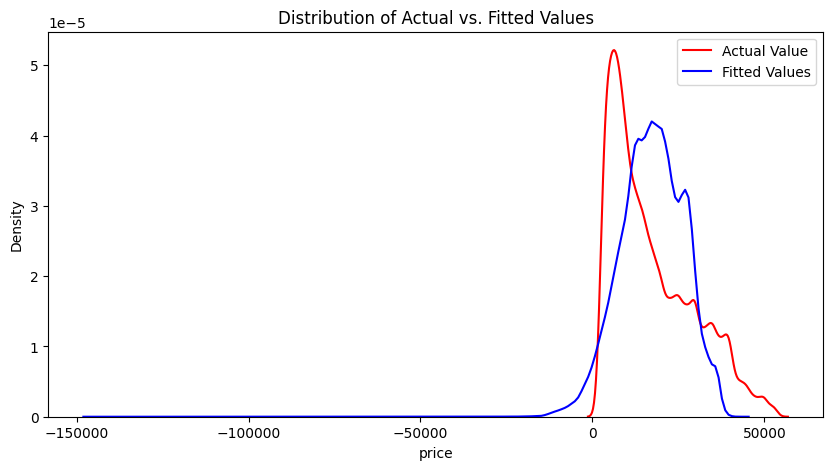

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot actual values
sns.kdeplot(data=dfc, x='price', color='r', label='Actual Value')
# sns.kdeplot(data=dfc, x='price', color='r', label='Actual Value', fill=True)

# Plot predicted values
sns.kdeplot(Yhat, color='b', label='Fitted Values')
# sns.kdeplot(Yhat, color='b', label='Fitted Values', fill=True)

plt.title('Distribution of Actual vs. Fitted Values')
plt.legend()
plt.show()
plt.close()


### Model 2: Polynomial Fit and Pipelines
* A special case of the general linear regression model
* Useful for describing curvilinear relationships
* Yhat = b0 + b1X1 + b2(X1)^2 + b3(X1)^3...

In [104]:

# using module Pipeline to create a pipeline, also use standardscaler as a step
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression




Create a PolynomialFeature object of degree 2:

In [107]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [109]:
X_pr=pr.fit_transform(X)

In [111]:
X.shape

(154112, 4)

In [113]:
X_pr.shape

(154112, 15)

#### Use Pipelines to Simplify Data Prediction Process
* There are many steps to getting a prediction, such as:
* Normalization --> Polynomial transform --> Linear Regression
* We can simplify the process using a Pipeline
* Pipeline use sequencial series transformations, the last step carries out the prediction

#### Pipe Steps: Normalization --> Polynomial transform --> Linear Regression
* The method normalize the data 
* perform a polynomial transform
* then outputs the prediction

In [117]:

# create a pipeline by creating a list of tuples including name of the model and constructor:
Input=[('scale',StandardScaler()), ('polynomial',PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]


In [119]:
# input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [121]:
# normalize the data and perform a transform and fit the model simultaneously 
X = X.astype(float)  # standardscaler takes float inputs
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [123]:
# similarly, we can normalize the data and perform a transform and produce a prediction simu
ypipe=pipe.predict(X)
ypipe

array([17400.16846761, 26067.06570603, 28165.73286331, ...,
       29901.98933397, 28482.2784291 , 26186.46333625], shape=(154112,))

Create a pipeline that standardizes the data and produce a prediction using linear regression model

Input=[('scale', StandardScaler()), ('model', LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X,y)
ypipe=pipe.predict(X)
ypipe[0:10]

### Prediction and Decision Making

#### Measures for In-sample Evaluation
* In-sample evaluation only tells us how well our model will fit the data used to train it
* It does not tell how well the trained model can be used to predict new data
* Mean Squared Error(MSE): the smaller the better
* R-squared(R^2) : how close the data is to the fitted line. between 0 to 1

##### MSE CALCULATION: (actual-prediction)^2/n

In [130]:

# import function mean_squared_error from module metrics
from sklearn.metrics import mean_squared_error
print('The MSE is: ', mean_squared_error(dfc.price, Yhat))

The MSE is:  59656491.258001626


In [132]:

# import function mean_squared_error from module metrics
from sklearn.metrics import mean_squared_error
print('The MSE is: ', mean_squared_error(dfc.price, ypipe))

The MSE is:  41215229.63094092


#### R-square CALCULATION

In [135]:
lm.fit(X, y)
print('The R-square value is: ', lm.score(X,y))

The R-square value is:  0.5852426113591382


In [137]:
from sklearn.metrics import r2_score


r_sq = r2_score(y, ypipe)
print('The R-square value is: ', r_sq)

The R-square value is:  0.7134541329285824


#### Multiple Linear Regression(MLR) vs. Polynomial Fit


#### Multiple Linear Regression
* MSE: 62658313.6689433
* R-squared: 0.5863985635312574
#### Polynomial Fit
* MSE: 43915138.58238987
* R-squared: 0.7101204399408685


Since the polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the MLR model.


# Model Refinement

## Cross validation and prediction

* Split dataset into: train set 70%, test set 30%
* Build and train the model with train set
* Test the performance with test set

In [145]:

# import lib
# random_state is for random seed generating
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test = train_test_split(X, y, test_size=0.3,random_state=0)

#### Use cross-validation by splitting the data into folds

In [148]:


from sklearn.model_selection import cross_val_score
scores= cross_val_score(lm, X, y, cv=3)
np.mean(scores)

np.float64(0.5788639006280171)

In [150]:

# function cross_val_predict()
# it returns the prediction that was obtained for each element when it was in the test set

from sklearn.model_selection import cross_val_predict
yhat=cross_val_predict(lm2e, X, y, cv=3)

NameError: name 'lm2e' is not defined

### Ridge Regression
* Ridge regression prevent overfitting.
* Ridge regression controls the magnitude of polynomial coefficients by introducing a hyperparameter, alpha.
* To determine alpha, you split your data into train and validation data,calculate R-square and store the values.
* Repeat the process for different alpha, training the model, make prediction
* you select the value of alpha that maximizes R-squared.

#### Ridge regression prevent
* The highest alpha value is usually the model with the most underfitting.
* The lowest alpha value is usually the model with the most overfitting.

In [152]:
from sklearn.linear_model import Ridge


# create Ridge object using constructor
RidgeModel=Ridge(alpha=0.1)
# train the model
RidgeModel.fit(X,y)
# make a prediction
R_yhat=RidgeModel.predict(X)

### Grid search
* Quickly test multiple parameters
* It also has option to normalize data

In [155]:
from sklearn.model_selection import GridSearchCV

# define dictionary of parameter values
parameters1=[{'alpha': [0.001,0.1,1,10,100,1000,10000,100000,1000000]}]
# create a ridge regression object model
RR=Ridge()
# create gridsearchcv object, the inputs are ridge regression object, paramters, number of folds
Grid1 = GridSearchCV(RR, parameters1, cv=4)
# fit the object
Grid1.fit(x_data(X,y))
# attrubutor best_estimator, find the best parameter
Grid1.best_estimator_
scores = Grid1.cv_results_
scores['mean_test_score']

NameError: name 'x_data' is not defined

# Concluding Remarks:
* Descriptive data analysis shows pupular features or market trends inlude: white color, four wheel drive, followed by front wheel drive. Ford is the most pupular brand.
  
* Correlation analysis suggested a weak positive correlation between price(dependent variable) and drive type(independent variable), a negative correlation between price(dependent variable) and age and odometer(independent variables).
* Inferential analysis suggested Model (odometer + age + cylinders + drive) has a R squared of 0.568, meaning the combination of odometer  + age + cylinders + drive can explain 56.8% variance in the listings.

### Save the csv file for visualization and analysis using Tableau

In [157]:

# save the file to a csv file for detailed visualization and analysis using Tableau:
dfc.to_csv('vehicles_for_tableau.csv', index= False)
